In [1]:
import pandas as pd
import numpy as np

In [2]:
newark_df = pd.read_csv('./data/merged/newark_merged.csv', index_col='Unnamed: 0')
newark_df.head()

,apparentTemperature,cloudCover,dewPoint,humidity,icon,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,...,Glo Mod (Wh/m^2),Glo Mod Unc (%),Dir Mod (Wh/m^2),Dir Mod Unc (%),Dif Mod (Wh/m^2),Dif Mod Unc (%),clear_sky,yesterday,avg_last_week,last_week_median
2006-01-02 00:00:00,36.81,0.82,31.40,0.81,partly-cloudy-night,NaN,0.0,0.0,NaN,1022.75,...,0,0,0,0,0,0,0.0,0.0,NaN,0.0
2006-01-02 01:00:00,35.79,0.22,30.80,0.82,clear-night,NaN,0.0,0.0,NaN,1022.80,...,0,0,0,0,0,0,0.0,0.0,NaN,0.0
2006-01-02 02:00:00,35.67,0.32,30.43,0.81,partly-cloudy-night,NaN,0.0,0.0,NaN,1023.57,...,0,0,0,0,0,0,0.0,0.0,NaN,0.0
2006-01-02 03:00:00,35.49,0.50,30.64,0.82,partly-cloudy-night,NaN,0.0,0.0,NaN,1023.57,...,0,0,0,0,0,0,0.0,0.0,NaN,0.0
2006-01-02 04:00:00,35.66,0.88,31.25,0.84,partly-cloudy-night,NaN,0.0,0.0,NaN,1023.31,...,0,0,0,0,0,0,0.0,0.0,NaN,0.0


In [3]:
newark_df.columns

Index(['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity', 'icon',
       'precipAccumulation', 'precipIntensity', 'precipProbability',
       'precipType', 'pressure', 'summary', 'temperature', 'uvIndex',
       'visibility', 'windBearing', 'windGust', 'windSpeed', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'Glo Mod (Wh/m^2)', 'Glo Mod Unc (%)',
       'Dir Mod (Wh/m^2)', 'Dir Mod Unc (%)', 'Dif Mod (Wh/m^2)',
       'Dif Mod Unc (%)', 'clear_sky', 'yesterday', 'avg_last_week',
       'last_week_median'],
      dtype='object')

In [4]:
# Drop as these columns have a ton of NaNs and are columns of strings.
newark_df = newark_df.drop(columns=["precipAccumulation", "precipType", "windGust", "icon", "summary", "ETR (Wh/m^2)", "ETRN (Wh/m^2)", "Dir Mod (Wh/m^2)", "Dif Mod (Wh/m^2)"])

In [5]:
# Ensure only avg last week is na
newark_df.isna().sum()

apparentTemperature      0
cloudCover               0
dewPoint                 0
humidity                 0
precipIntensity          0
precipProbability        0
pressure                 0
temperature              0
uvIndex                  0
visibility               0
windBearing              0
windSpeed                0
Glo Mod (Wh/m^2)         0
Glo Mod Unc (%)          0
Dir Mod Unc (%)          0
Dif Mod Unc (%)          0
clear_sky                0
yesterday                0
avg_last_week          145
last_week_median         0
dtype: int64

In [6]:
newark_df.head()

,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,visibility,windBearing,windSpeed,Glo Mod (Wh/m^2),Glo Mod Unc (%),Dir Mod Unc (%),Dif Mod Unc (%),clear_sky,yesterday,avg_last_week,last_week_median
2006-01-02 00:00:00,36.81,0.82,31.40,0.81,0.0,0.0,1022.75,36.81,0,10.00,246,1.75,0,0,0,0,0.0,0.0,NaN,0.0
2006-01-02 01:00:00,35.79,0.22,30.80,0.82,0.0,0.0,1022.80,35.79,0,10.00,234,1.86,0,0,0,0,0.0,0.0,NaN,0.0
2006-01-02 02:00:00,35.67,0.32,30.43,0.81,0.0,0.0,1023.57,35.67,0,10.00,216,1.55,0,0,0,0,0.0,0.0,NaN,0.0
2006-01-02 03:00:00,35.49,0.50,30.64,0.82,0.0,0.0,1023.57,35.49,0,9.74,225,0.81,0,0,0,0,0.0,0.0,NaN,0.0
2006-01-02 04:00:00,35.66,0.88,31.25,0.84,0.0,0.0,1023.31,35.66,0,9.68,216,0.63,0,0,0,0,0.0,0.0,NaN,0.0


In [7]:
from sklearn.model_selection import train_test_split

def train_test_split_df(df):
    df = df.dropna()
    X = df.drop(columns="Glo Mod (Wh/m^2)")
    y = df.loc[:, ["Glo Mod (Wh/m^2)"]]

    X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = train_test_split_df(newark_df)

In [8]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

rfr_train_score = rfr.score(X_train, y_train)
rfr_val_score = rfr.score(X_val, y_val)

print('Train Score: ', rfr_train_score)
print('Validation Score: ', rfr_val_score)

/Users/jack/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Train Score:  0.984942736298523
Validation Score:  0.9029825798498989


To visualize what features are used for the largest splits, let's restrict the depth of the decision trees and visualize a tree with graphviz.

In [ ]:
rfr_limited_depth = RandomForestRegressor(max_depth=4)
rfr_limited_depth.fit(X_train, y_train)

# Extract single tree
estimator = rfr_limited_depth.estimators_[5]

Luckily, we can copy the code and visualize the tree on Webgraphviz. By running the following cell, you'll see a pretty long output -- follow the link and copy and paste the output to get a visualization of the decision tree we fit!

In [ ]:
import graphviz
from sklearn import tree

print(tree.export_graphviz(estimator, feature_names=X_train.columns, out_file=None))

We observe that uvIndex, avg_last_week, clear_sky, and cloudCover are among the most important features as they result in the best splits of data.

In [ ]:
np.array(y_train).reshape(y_train.shape[0])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 101, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 1, stop = 9, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [20, 100, 150, 200]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
param_dict = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = param_dict, n_iter = 50, cv = 10, random_state=42)
# Fit the random search model
rf_random.fit(X_train, np.array(y_train).reshape(y_train.shape[0]))

print(rf_random.best_params_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 121, stop = 151, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 1, stop = 9, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 10, 15, 20]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
param_dict = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = param_dict, n_iter = 50, cv = 10, random_state=42)
# Fit the random search model
rf_random.fit(X_train, np.array(y_train).reshape(y_train.shape[0]))

print(rf_random.best_params_)

In [24]:
# With best params found above
rfr_tree = RandomForestRegressor(n_estimators=151, min_samples_split=2, max_features='sqrt', max_depth=None, bootstrap=True)
rfr_tree.fit(X_train, y_train)

rfr_train_score = rfr_tree.score(X_train, y_train)
rfr_val_score = rfr_tree.score(X_val, y_val)

print('Train Score: ', rfr_train_score)
print('Validation Score: ', rfr_val_score)

/Users/jack/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Train Score:  0.9894775103511683
Validation Score:  0.9153686762379917


## Random forests for the other 4 locations.

In [31]:
import matplotlib.pyplot as plt

def get_rfr(loc_name):
    merged = pd.read_csv('./data/merged/' + loc_name + '_merged.csv', index_col='Unnamed: 0')
    merged = merged.drop(columns=["precipAccumulation", "precipType", "windGust", "icon", "summary", "ETR (Wh/m^2)", "ETRN (Wh/m^2)", "Dir Mod (Wh/m^2)", "Dif Mod (Wh/m^2)", "cloudCoverError"])
    merged = merged.dropna(thresh=len(merged) - 150, axis=1)
    print(merged.shape)
    X_train, y_train, X_val, y_val, X_test, y_test = train_test_split_df(merged)
    print(X_train.shape)
    
    # Fit tree with best newark params as a starting point.
    rfr_tree = RandomForestRegressor()
    rfr_tree.fit(X_train, y_train)
    
    train_score = rfr_tree.score(X_train, y_train)
    val_score = rfr_tree.score(X_val, y_val)

    print('Train Score: ', train_score)
    print('Validation Score: ', val_score)

    importances = sorted((100 / max(rfr_tree.feature_importances_)) * rfr_tree.feature_importances_)

    im_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
    im_df = im_df.sort_values(by="Importance", ascending=False)
    im_df.plot.bar(x='Feature', y='Importance')
    plt.show()

    return rfr_tree

(43536, 20)
(31240, 19)


/Users/jack/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Train Score:  0.9847661226341575
Validation Score:  0.9218088647869461


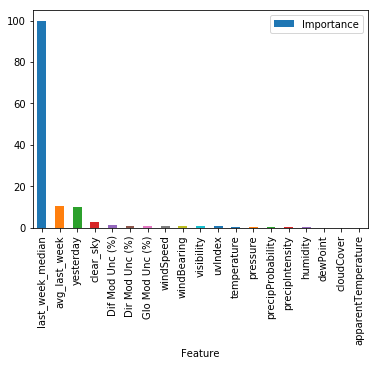

(43560, 20)
(31232, 19)


/Users/jack/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Train Score:  0.9835467569263731
Validation Score:  0.9049242221642241


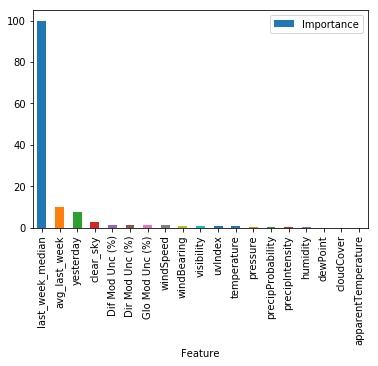

(43560, 21)
(31255, 20)


/Users/jack/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Train Score:  0.9560357395427903
Validation Score:  0.7602052284331017


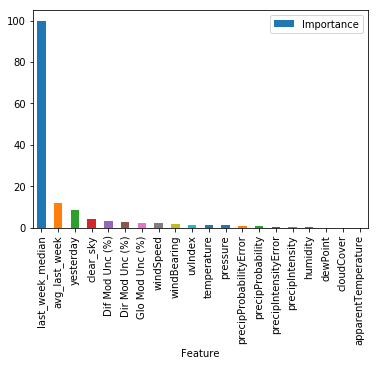

(43560, 19)
(31239, 18)


/Users/jack/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Train Score:  0.9846027189079981
Validation Score:  0.9132628804488094


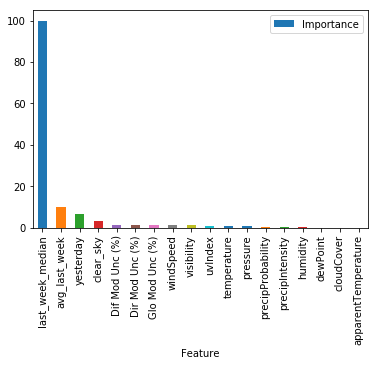

In [32]:
jfk_rfr = get_rfr("jfk")
bridgeport_rfr = get_rfr("bridgeport")
laguardia_rfr = get_rfr("laguardia")
li_macarthur_rfr = get_rfr("li_macarthur")

We notice that last week median is overwhelmingly and consistently the most prominent feature used to predict solar irradiance (Glo Mod (Wh/m^2)).
